#### Goal:
### Explore the COVID-19 Global dataset, clean data, perform analysis, and visualize results using NumPy, Pandas, Matplotlib, and Seaborn.
### 1. Why This Project?
1. Learn data cleaning with Pandas.
2. Use NumPy for calculations (mean, median, etc.).
3. Visualize trends using Matplotlib and Seaborn.
4. Understand global COVID-19 trends, country-wise impact, and correlations between cases, deaths, and testing.
### 2. Import Libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sns.set_theme(style="whitegrid")

### 3. Load Dataset

In [10]:
df = pd.read_csv('WHO-COVID-19-global-data.csv')
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


### 4. Explore Data

In [11]:
print("Shape:", df.shape)
print(df.info())
print(df.isnull().sum())
print(df.describe())

Shape: (323268, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323268 entries, 0 to 323267
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Date_reported      323268 non-null  object
 1   Country_code       321904 non-null  object
 2   Country            323268 non-null  object
 3   WHO_region         323268 non-null  object
 4   New_cases          323268 non-null  int64 
 5   Cumulative_cases   323268 non-null  int64 
 6   New_deaths         323268 non-null  int64 
 7   Cumulative_deaths  323268 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 19.7+ MB
None
Date_reported           0
Country_code         1364
Country                 0
WHO_region              0
New_cases               0
Cumulative_cases        0
New_deaths              0
Cumulative_deaths       0
dtype: int64
          New_cases  Cumulative_cases     New_deaths  Cumulative_deaths
count  3.232680e+05      3.232680e+05  323

### Insights:

The dataset contains daily COVID-19 statistics for multiple countries.

Missing values exist in 'new_cases', 'new_deaths', and other columns.

Converting 'date' to datetime will help in time-based analysis.

### 5. Data Cleaning

In [16]:
df['Date_reported'] = pd.to_datetime(df['Date_reported'])
df['New_cases'] = df['New_cases'].fillna(0)
df['New_deaths'] = df['New_deaths'].fillna(0)
df = df.dropna(subset=['Country'])

### Insights:

Date conversion allows proper chronological analysis.

Filling missing 'new_cases' and 'new_deaths' with 0 handles unreported days.

Dropping rows without country ensures every record is linked to a country.

### 6. Analysis with NumPy & Pandas

In [18]:
total_cases = df['Cumulative_cases'].max()
print("Cumulative Cases:", total_cases)

avg_new_cases = df.groupby('Country')['New_cases'].mean().mean()
print("Average New Cases per Day:", avg_new_cases)

top_countries = df.groupby('Country')['Cumulative_cases'].max().sort_values(ascending=False).head(10)
print("Top 10 Countries by Total Cases:\n", top_countries)

Cumulative Cases: 103436829
Average New Cases per Day: 2384.632667013129
Top 10 Countries by Total Cases:
 Country
United States of America    103436829
China                        99311610
India                        44998525
France                       38997490
Germany                      38437756
Brazil                       37720419
Republic of Korea            34571873
Japan                        33803572
Italy                        26007789
The United Kingdom           24715857
Name: Cumulative_cases, dtype: int64


### Insights:

Total confirmed cases highlight the global scale of the pandemic.

Average new cases indicate daily case trends.

Top countries by total cases show which regions were most affected.

### 7. Visualization with Matplotlib


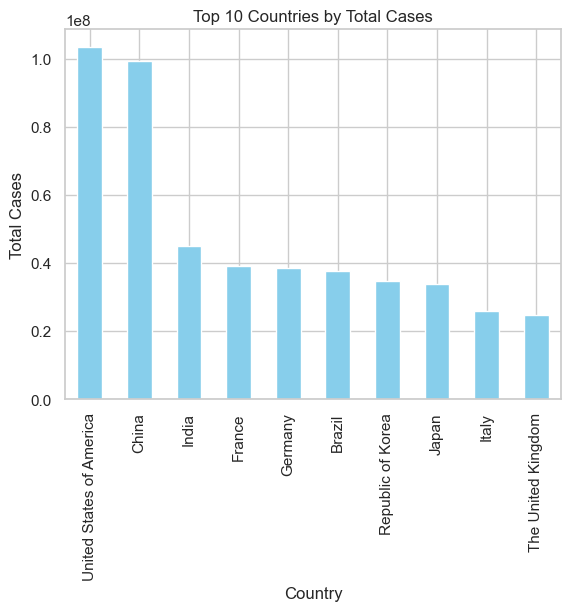

In [19]:
top_countries.plot(kind='bar', color='skyblue')
plt.title("Top 10 Countries by Total Cases")
plt.xlabel("Country")
plt.ylabel("Total Cases")
plt.show()

### Insights:

Bar chart clearly shows which countries have the highest number of COVID-19 cases.

### 8. Visualization with Seaborn

C:\Users\POOJASRIMENDU\AppData\Local\Temp\ipykernel_31072\3148496812.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Country', data=df, palette='Set2')


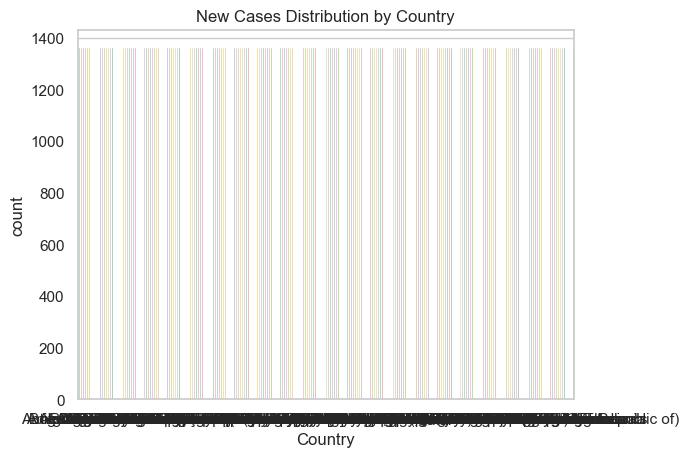

In [21]:
sns.countplot(x='Country', data=df, palette='Set2')
plt.title("New Cases Distribution by Country")
plt.show()

### Insights:

Distribution by continent shows regional trends and impact of the pandemic.

### 9. Correlation Heatmap

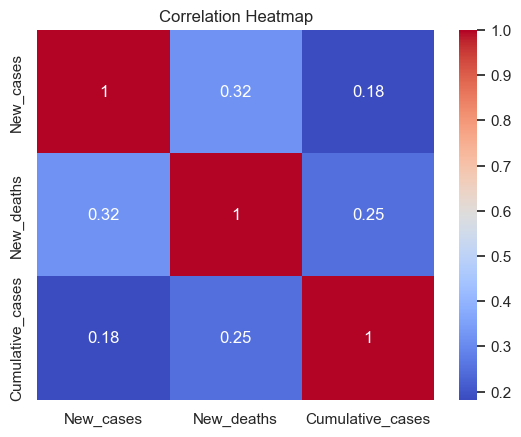

In [22]:
corr = df[['New_cases', 'New_deaths', 'Cumulative_cases']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### Insights:

Correlation analysis helps understand the relationship between new cases, deaths, and testing across countries.